In [1]:
import numpy as np
from pandas import DataFrame
import matplotlib
matplotlib.rcParams['font.size'] = 12

In [2]:
class Bandit:
  def __init__(self, arms=10):
    self.arms = arms
    self.means = np.linspace(-2, 1.5, arms)

  def select(self, arm):
    reward = np.random.normal(loc=self.means[arm], scale=1.0)
    return reward

In [3]:
def get_action(qs, epsilon):
  if np.random.random() < epsilon:
    # Explore: choose randomly.
    return np.random.randint(len(qs))
  else:
    # Exploit: choose the arm with the max average.
    return np.argmax(qs)

In [4]:
def episode(bandit, q_0, steps):
  qs = [q_0] * bandit.arms
  qs_hist = {}
  # Initialize qs_hist with empty lists.
  for arm in range(bandit.arms):
    qs_hist[arm] = []
 
  for _ in range(steps):
    arm = get_action(qs, epsilon=0.1)
    reward = bandit.select(arm)
    # Update an estimate with a constant weight 0.1.
    qs[arm] += 0.1 * (reward - qs[arm])

    # Record the estimates of means
    for arm in range(bandit.arms):
      qs_hist[arm].append(qs[arm])

  return qs_hist

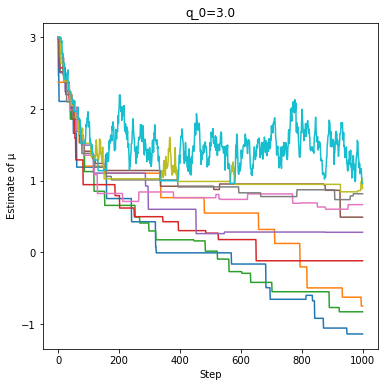

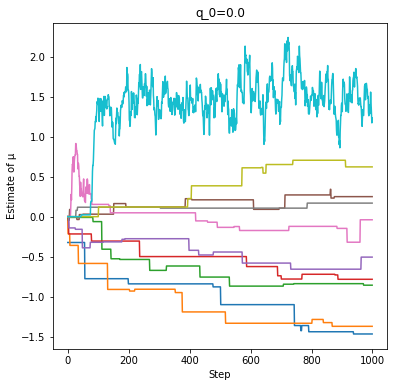

In [8]:
bandit = Bandit()

qs_hist = episode(bandit, q_0=3.0, steps=1000)
ax = DataFrame(qs_hist).plot(title='q_0=3.0', figsize=(6, 6), legend=False)
_ = ax.set_xlabel('Step')
_ = ax.set_ylabel('Estimate of μ')

qs_hist = episode(bandit, q_0=0.0, steps=1000)
ax = DataFrame(qs_hist).plot(title='q_0=0.0', figsize=(6, 6), legend=False)
_ = ax.set_xlabel('Step')
_ = ax.set_ylabel('Estimate of μ')